# Plant Disease Detection using CNN

In [ ]:
import torch
imprt
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.9.0+cpu


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [1]:
import kagglehub

dataset_path = kagglehub.dataset_download('alyeko/potato-tomato-dataset')

print(f"Dataset downloaded to: {dataset_path}")


100%|██████████| 229M/229M [00:01<00:00, 162MB/s]  

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1


In [11]:
!ls '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset'

ImageDataset  test_data


In [12]:
!ls '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset'

train  valid


In [16]:
!ls '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/test_data'

test


In [19]:
!ls '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/test_data/test'

potato_early_100.JPG	potato_late_51.JPG	tomato_healthy_57.JPG
potato_early_102.JPG	potato_late_53.JPG	tomato_healthy_59.JPG
potato_early_104.JPG	potato_late_55.JPG	tomato_healthy_5.JPG
potato_early_106.JPG	potato_late_57.JPG	tomato_healthy_61.JPG
potato_early_108.JPG	potato_late_59.JPG	tomato_healthy_63.JPG
potato_early_10.JPG	potato_late_5.JPG	tomato_healthy_65.JPG
potato_early_110.JPG	potato_late_61.JPG	tomato_healthy_67.JPG
potato_early_112.JPG	potato_late_63.JPG	tomato_healthy_69.JPG
potato_early_114.JPG	potato_late_65.JPG	tomato_healthy_71.JPG
potato_early_116.JPG	potato_late_67.JPG	tomato_healthy_73.JPG
potato_early_118.JPG	potato_late_69.JPG	tomato_healthy_75.JPG
potato_early_120.JPG	potato_late_71.JPG	tomato_healthy_77.JPG
potato_early_122.JPG	potato_late_73.JPG	tomato_healthy_79.JPG
potato_early_124.JPG	potato_late_75.JPG	tomato_healthy_7.JPG
potato_early_126.JPG	potato_late_77.JPG	tomato_healthy_81.JPG
potato_early_128.JPG	potato_late_79.JPG	tomato_healthy_83.JPG
potato_early

In [20]:
!ls '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/train'

potato_early	potato_late   tomato_healthy
potato_healthy	tomato_early  tomato_late


In [22]:
!ls '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/train/potato_early'

potato_early_1000_ccrp_1.JPG  potato_early_1110_gblr_4.JPG
potato_early_1000_ccrp_2.JPG  potato_early_1110_rrot_1.JPG
potato_early_1000_ccrp_3.JPG  potato_early_1111_ccrp_1.JPG
potato_early_1000_ccrp_4.JPG  potato_early_1111_ccrp_2.JPG
potato_early_1000_gblr_1.JPG  potato_early_1111_ccrp_3.JPG
potato_early_1000_gblr_2.JPG  potato_early_1111_ccrp_4.JPG
potato_early_1000_gblr_3.JPG  potato_early_1111_gblr_1.JPG
potato_early_1000_gblr_4.JPG  potato_early_1111_gblr_2.JPG
potato_early_1000_rrot_1.JPG  potato_early_1111_gblr_3.JPG
potato_early_1001_ccrp_1.JPG  potato_early_1111_gblr_4.JPG
potato_early_1001_ccrp_2.JPG  potato_early_1111_rrot_1.JPG
potato_early_1001_ccrp_3.JPG  potato_early_1112_ccrp_1.JPG
potato_early_1001_ccrp_4.JPG  potato_early_1112_ccrp_2.JPG
potato_early_1001_gblr_1.JPG  potato_early_1112_ccrp_3.JPG
potato_early_1001_gblr_2.JPG  potato_early_1112_ccrp_4.JPG
potato_early_1001_gblr_3.JPG  potato_early_1112_gblr_1.JPG
potato_early_1001_gblr_4.JPG  potato_early_1112_gblr_2.J

In [21]:
!ls '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/valid'

potato_early	potato_late   tomato_healthy
potato_healthy	tomato_early  tomato_late


In [24]:
from pathlib import Path

In [25]:
data_root = Path(dataset_path)

In [26]:
data_root

PosixPath('/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1')

In [27]:
from torchvision import datasets, transforms

In [28]:
transorms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [44]:
train_path = '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/train'

valid_path = '/root/.cache/kagglehub/datasets/alyeko/potato-tomato-dataset/versions/1/idata/Image Dataset/ImageDataset/valid'

train_data = datasets.ImageFolder(root=train_path, transform=transorms)
valid_data = datasets.ImageFolder(root=valid_path, transform=transorms)

In [45]:
train_data.class_to_idx

{'potato_early': 0,
 'potato_healthy': 1,
 'potato_late': 2,
 'tomato_early': 3,
 'tomato_healthy': 4,
 'tomato_late': 5}

In [46]:
valid_data.class_to_idx

{'potato_early': 0,
 'potato_healthy': 1,
 'potato_late': 2,
 'tomato_early': 3,
 'tomato_healthy': 4,
 'tomato_late': 5}

In [34]:
len(train_data)

12009

In [47]:
len(valid_data)

1331

In [35]:
import random

Random number: 533
Image shape: torch.Size([3, 224, 224])
Label: 0


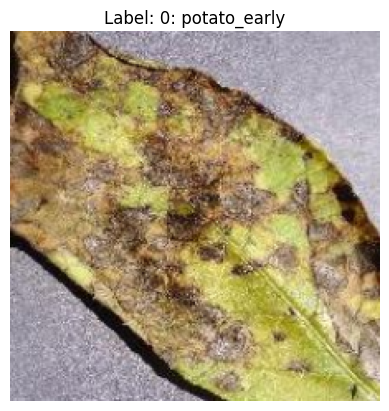

In [43]:
# write code to get the first image and label from the training
random_number = random.randint(0, len(train_data)-1)
print(f"Random number: {random_number}")
image, label = train_data[random_number]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")
import matplotlib.pyplot as plt
# write code to plot the first image from the training data
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {label}: {train_data.classes[label]}")
plt.axis("off")
plt.show()

Random number: 451
Image shape: torch.Size([3, 224, 224])
Label: 2


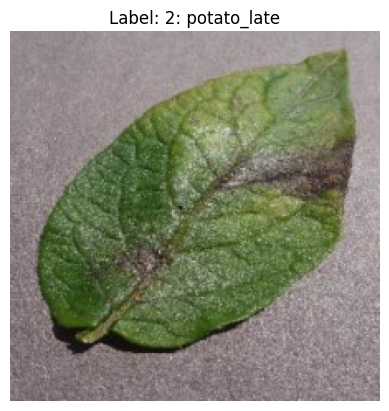

In [51]:
# write code to get the first image and label from the training
random_number = random.randint(0, len(valid_data)-1)
print(f"Random number: {random_number}")
image, label = valid_data[random_number]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")
import matplotlib.pyplot as plt
# write code to plot the first image from the validation data
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {label}: {valid_data.classes[label]}")
plt.axis("off")
plt.show()

In [52]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=32, shuffle=False)

In [53]:
import torch.nn as nn